#Part 1: Temporal Trends


In [1]:
!pip install pandas matplotlib seaborn plotly


<ipython-input-2-84c5df4167a1>:21: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  confirmed_long['Date'] = pd.to_datetime(confirmed_long['Date'])
<ipython-input-2-84c5df4167a1>:22: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  deaths_long['Date'] = pd.to_datetime(deaths_long['Date'])


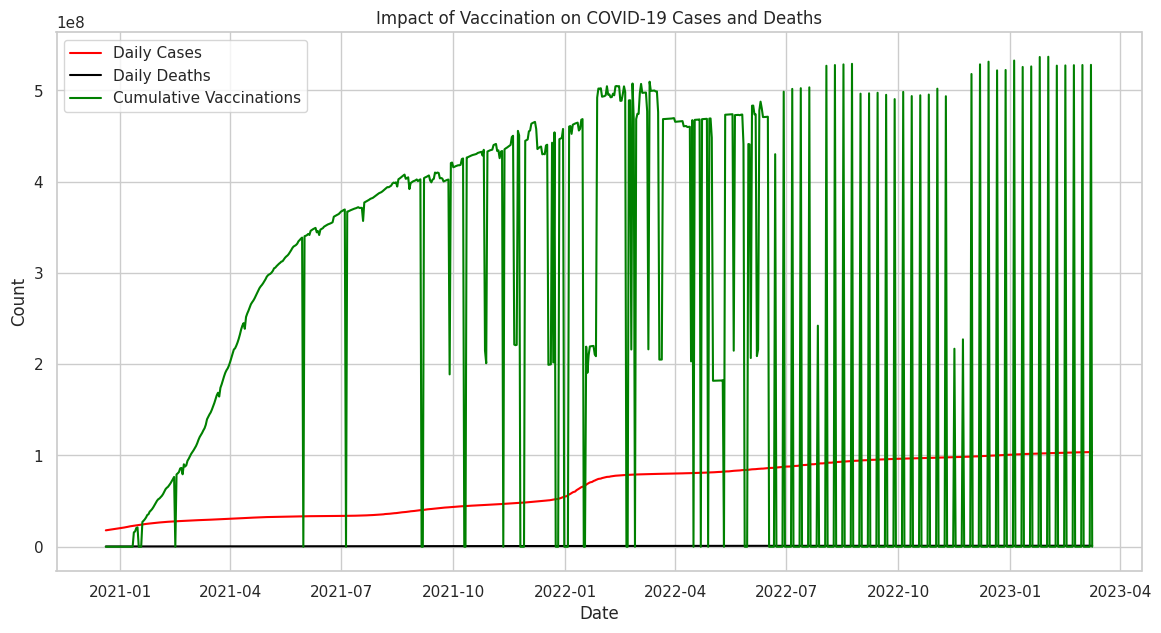

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the vaccination data and cases data
vaccinations_path = '/content/us_state_vaccinations.csv'
vaccinations_df = pd.read_csv(vaccinations_path)

# Assuming you have a daily cases and deaths dataset loaded
# For this example, let's use the previous confirmed cases dataset
confirmed_cases_path = '/content/time_series_covid19_confirmed_US.csv'
deaths_cases_path = '/content/time_series_covid19_deaths_US.csv'
confirmed_df = pd.read_csv(confirmed_cases_path)
deaths_df = pd.read_csv(deaths_cases_path)

# Convert date columns in cases and deaths data
date_cols = confirmed_df.columns[11:]
confirmed_long = confirmed_df.melt(id_vars=["Province_State"], value_vars=date_cols, var_name="Date", value_name="Cases")
deaths_long = deaths_df.melt(id_vars=["Province_State"], value_vars=date_cols, var_name="Date", value_name="Deaths")

confirmed_long['Date'] = pd.to_datetime(confirmed_long['Date'])
deaths_long['Date'] = pd.to_datetime(deaths_long['Date'])
vaccinations_df['date'] = pd.to_datetime(vaccinations_df['date'])

# Aggregate national data
national_cases = confirmed_long.groupby('Date')['Cases'].sum()
national_deaths = deaths_long.groupby('Date')['Deaths'].sum()
national_vaccinations = vaccinations_df.groupby('date')['people_vaccinated'].sum()

# Combine datasets for analysis
combined_df = pd.DataFrame({
    'Cases': national_cases,
    'Deaths': national_deaths,
    'Vaccinations': national_vaccinations
}).dropna()

# Plotting
sns.set(style="whitegrid")
plt.figure(figsize=(14, 7))
plt.plot(combined_df.index, combined_df['Cases'], label='Daily Cases', color='red')
plt.plot(combined_df.index, combined_df['Deaths'], label='Daily Deaths', color='black')
plt.plot(combined_df.index, combined_df['Vaccinations'], label='Cumulative Vaccinations', color='green')
plt.title('Impact of Vaccination on COVID-19 Cases and Deaths')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend()
plt.show()


In [3]:
!pip install plotly


In [9]:
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots


vaccinations_df = pd.read_csv(vaccinations_path)
confirmed_df = pd.read_csv(confirmed_cases_path)
deaths_df = pd.read_csv(deaths_cases_path)

# Preprocess cases and deaths data
date_cols = confirmed_df.columns[11:]
confirmed_long = confirmed_df.melt(id_vars=["Province_State"], value_vars=date_cols, var_name="Date", value_name="Cases")
deaths_long = deaths_df.melt(id_vars=["Province_State"], value_vars=date_cols, var_name="Date", value_name="Deaths")

confirmed_long['Date'] = pd.to_datetime(confirmed_long['Date'])
deaths_long['Date'] = pd.to_datetime(deaths_long['Date'])
vaccinations_df['date'] = pd.to_datetime(vaccinations_df['date'])

# National aggregation of data
national_cases = confirmed_long.groupby('Date')['Cases'].sum()
national_deaths = deaths_long.groupby('Date')['Deaths'].sum()
national_vaccinations = vaccinations_df.groupby('date').agg({'people_vaccinated': 'sum', 'people_fully_vaccinated': 'sum'})

# Combine datasets
combined_data = pd.DataFrame({
    'Cases': national_cases,
    'Deaths': national_deaths
}).join(national_vaccinations, how='outer').fillna(method='ffill').dropna()




<ipython-input-9-368ae7fd2767>:15: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.

<ipython-input-9-368ae7fd2767>:16: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.



In [7]:
# Create interactive subplots using Plotly
fig = make_subplots(specs=[[{"secondary_y": True}]])

# Add traces for cases, deaths, and vaccinations
fig.add_trace(go.Scatter(x=combined_data.index, y=combined_data['Cases'], name='Daily Cases', mode='lines+markers', marker=dict(color='Red')), secondary_y=False)
fig.add_trace(go.Scatter(x=combined_data.index, y=combined_data['Deaths'], name='Daily Deaths', mode='lines+markers', marker=dict(color='Black')), secondary_y=False)
fig.add_trace(go.Scatter(x=combined_data.index, y=combined_data['people_vaccinated'], name='People Vaccinated', mode='lines+markers', marker=dict(color='Green')), secondary_y=True)

# Add layout settings
fig.update_layout(title_text='Impact of Vaccinations on COVID-19 Cases and Deaths', xaxis_title='Date', template='plotly_dark')
fig.update_yaxes(title_text='Cases and Deaths', secondary_y=False)
fig.update_yaxes(title_text='Number of People Vaccinated', secondary_y=True)

# Display the figure
fig.show()